array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

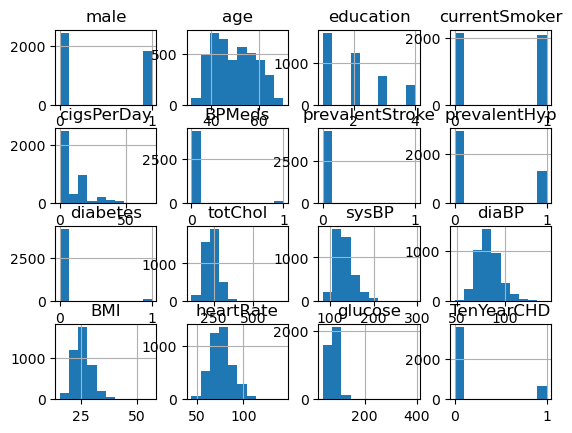

In [4]:
# Cargar las librerias necesarias
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
import pandas as pd

# Leer los datos
data = pd.read_csv("C:/Users/pipeg/Desktop/U/S6/Analisis de Datos/Etapa 2/framingham.csv", sep=",")

# Visualización de datos
data.hist()



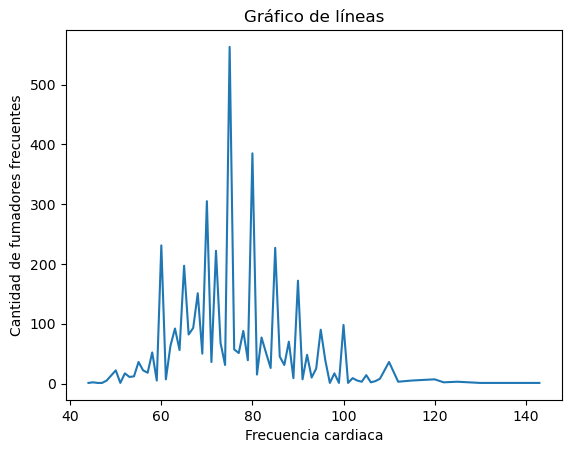

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# Graficar la frecuencia cardiaca vs cantidad de fumadores frecuentes
frecuencia_corazon_fumador = data.groupby(["heartRate"]).count()["currentSmoker"]
plt.plot(frecuencia_corazon_fumador)
plt.title("Gráfico de líneas")
plt.xlabel("Frecuencia cardiaca")
plt.ylabel("Cantidad de fumadores frecuentes")
plt.show()

# Visualización de datos de las primeras filas
data.head()



<Axes: xlabel='heartRate', ylabel='currentSmoker'>

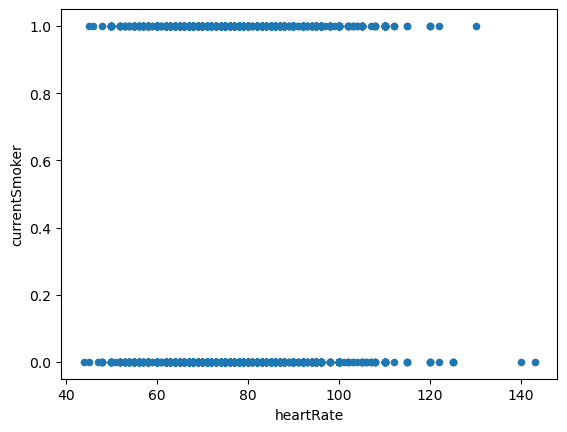

In [6]:
# Gráfico de dispersión
data[["heartRate", "currentSmoker"]].plot.scatter(x="heartRate", y="currentSmoker")



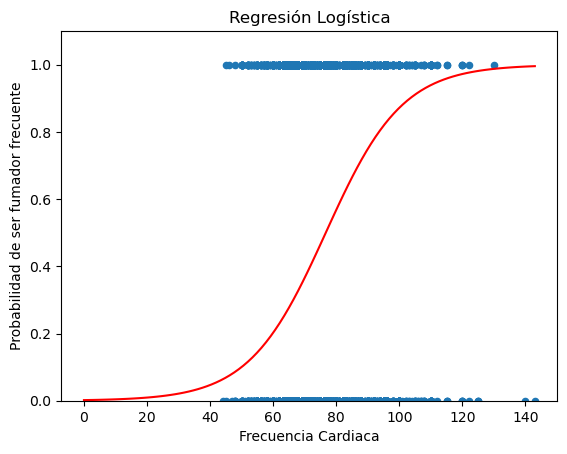

In [7]:
# Parámetros iniciales de la regresión logística
w = 0.0822
b = -6.304

# Crear un conjunto de datos para graficar la recta de regresión
x = np.linspace(0, data['heartRate'].max(), 100)
y = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la recta de regresión
data.plot.scatter(x='heartRate', y='currentSmoker')
plt.plot(x, y, '-r')
plt.ylim(0, data['currentSmoker'].max() * 1.1)
plt.title("Regresión Logística")
plt.xlabel("Frecuencia Cardiaca")
plt.ylabel("Probabilidad de ser fumador frecuente")
plt.show()



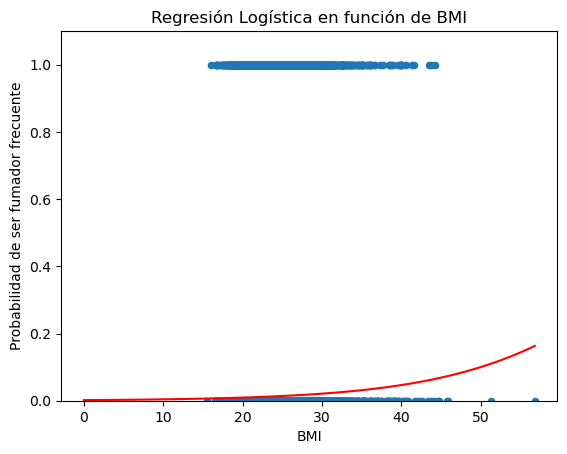

Parámetros finales: 0.0650791996687654 -5.010985479607846


In [8]:
# Funciones de derivadas parciales
def delta_j_w(w, b):
    data['sigmoid'] = 1 / (1 + np.exp(-(data['heartRate'] * w + b)))
    data['partial_loss'] = (data['sigmoid'] - data['currentSmoker']) * data['BMI']
    derivative = data['partial_loss'].mean()
    return derivative

def delta_j_b(w, b):
    data['sigmoid'] = 1 / (1 + np.exp(-(data['heartRate'] * w + b)))
    data['partial_loss'] = (data['sigmoid'] - data['currentSmoker'])
    derivative = data['partial_loss'].mean()
    return derivative

# Crear un conjunto de datos para graficar la recta de regresión en función de BMI
x = np.linspace(0, data['BMI'].max(), 100)
y = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la recta de regresión en función de BMI y currentSmoker
data.plot.scatter(x='BMI', y='currentSmoker')
plt.plot(x, y, '-r')
plt.ylim(0, data['currentSmoker'].max() * 1.1)
plt.title("Regresión Logística en función de BMI")
plt.xlabel("BMI")
plt.ylabel("Probabilidad de ser fumador frecuente")
plt.show()


# Parámetros iniciales para el descenso de gradiente
w_0 = 0.30336
b_0 = -5.56
alpha_w = 0.001
alpha_b = 0.1

# Iteraciones de descenso de gradiente
for _ in range(1000):
    w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
    b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)
    w_0 = w_new
    b_0 = b_new

print("Parámetros finales:", w_0, b_0)